# **Title- Zomato Price Prediction For Two**

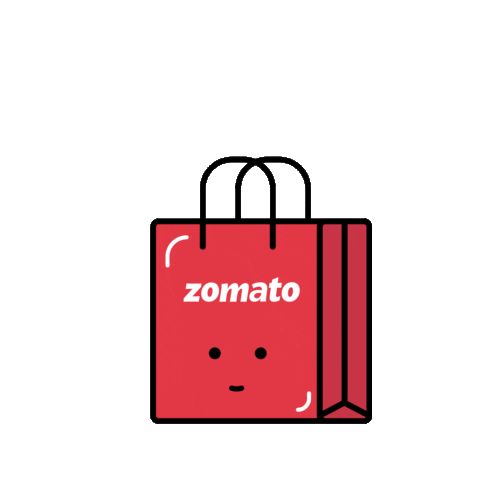

**Project Type - Supervised learning (Regression)**

 **Contribution - Individual**

 **Name - Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

      1. Gathering Data
          - CSV and others files
          - APIs
          - Web Scraping
          - Databases
      2. Assessing Data
      3. Cleaning Data

* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

      1. Train, Test and Split
      2. preprocessing using column-transformer
      3. make best pipeline
          
* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


This problem statement contains two datasets- `Zomato.csv` and `country_code.csv`.
Country_code.csv contains two variables:

`Country code`

`Country name`

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

• `Restaurant Id`: Unique id of every restaurant across various cities of the world.

• `Restaurant Name`: Name of the restaurant

• `Country Code`: Country in which restaurant is located

• `City`: City in which restaurant is located

• `Address`: Address of the restaurant

• `Locality`: Location in the city

• `Locality Verbose`: Detailed description of the locality

• `Longitude`: Longitude coordinate of the restaurant&#39;s location

• `Latitude`: Latitude coordinate of the restaurant&#39;s location

• `Cuisines`: Cuisines offered by the restaurant

• `Average Cost for two`: Cost for two people in different currencies

• `Currency`: Currency of the country

• `Has Table booking`: yes/no

• `Has Online delivery`: yes/ no

• `Is delivering`: yes/ no

• `Switch to order menu`: yes/no

• `Price range`: range of price of food

• `Aggregate Rating`: Average rating out of 5

• `Rating color`: depending upon the average rating color

• `Rating text`: text on the basis of rating of rating

• `Votes`: Number of ratings casted by people


In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating dataframe for country code
df_1=pd.read_excel('/content/Country-Code.xlsx')

# reading first 5 rows
df_1.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [3]:
# checking the number of rows and columns in df_1
df_1.shape
print('The number of rows are :',df_1.shape[0])
print('The number of columns are :',df_1.shape[1])

The number of rows are : 15
The number of columns are : 2


* **The Number Of rows are only 15, which means there must been only 15 unique countries in the dataframe.**

In [4]:
# creting dataframe for zomatao
df_2=pd.read_csv('/content/zomato.csv',encoding='ISO-8859-1')

# reading first 5 rows
df_2.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
# checking number of rows and columns
df_2.shape
print('The number of rows are :',df_2.shape[0])
print('The number of columns are :',df_2.shape[1])

The number of rows are : 9551
The number of columns are : 21


## **Merging both datasets to create on dataframe**

In [6]:
# merging both datasets
df=pd.merge(df_1,df_2,on='Country Code',how='left')

In [7]:
# checking numbers of rows and columns
df.shape
print('The number of rows in new datframe are :',df.shape[0])
print('The number of columns in new datframe are :',df.shape[1])

The number of rows in new datframe are : 9551
The number of columns in new datframe are : 22


In [8]:
# lets view first 5 rows
df.head()

Country Code Country  Restaurant ID                        Restaurant Name  \
0             1   India        3400025                             Jahanpanah   
1             1   India        3400341                    Rangrezz Restaurant   
2             1   India        3400005                Time2Eat - Mama Chicken   
3             1   India        3400021  Chokho Jeeman Marwari Jain Bhojanalya   
4             1   India        3400017                         Pinch Of Spice   

   City                                            Address     Locality  \
0  Agra  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
1  Agra  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
2  Agra        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
3  Agra  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
4  Agra  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

    Locality Verbose  Longitude   Latitude  ...            Currency  \
0   Agra Cantt, Agra  78.011544  27.161661  ...  Indian Rupees(Rs.)   
1   Agra Cantt, Agra   0.000000   0.000000  ...  Indian Rupees(Rs.)   
2   Agra Cantt, Agra  78.011608  27.160832  ...  Indian Rupees(Rs.)   
3  Civil Lines, Agra  77.998092  27.195928  ...  Indian Rupees(Rs.)   
4  Civil Lines, Agra  78.007553  27.201725  ...  Indian Rupees(Rs.)   

   Has Table booking Has Online delivery Is delivering now  \
0                 No                  No                No   
1                 No                  No                No   
2                 No                  No                No   
3                 No                  No                No   
4                 No                  No                No   

  Switch to order menu Price range Aggregate rating  Rating color  \
0                   No           3              3.9        Yellow   
1                   No           2              3.5        Yellow   
2                   No           2              3.6        Yellow   
3                   No           2              4.0         Green   
4                   No           3              4.2         Green   

   Rating text Votes  
0         Good   140  
1         Good    71  
2         Good    94  
3    Very Good    87  
4    Very Good   177  

[5 rows x 22 columns]

In [9]:
# viewing each column names
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df.describe().T

count          mean           std         min  \
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [11]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# checking the rows having cuisene null values
df[df['Cuisines'].isnull()]

Country Code        Country  Restaurant ID  \
9119           216  United States       17284105   
9122           216  United States       17284211   
9129           216  United States       17284158   
9323           216  United States       17374552   
9347           216  United States       17501439   
9363           216  United States       17606621   
9384           216  United States       17059060   
9430           216  United States       17142698   
9467           216  United States       17616465   

                     Restaurant Name            City  \
9119                   Cookie Shoppe          Albany   
9122  Pearly's Famous Country Cookng          Albany   
9129               Jimmie's Hot Dogs          Albany   
9323                  Corkscrew Cafe     Gainesville   
9347                        Dovetail           Macon   
9363            HI Lite Bar & Lounge          Miller   
9384                       Hillstone         Orlando   
9430                Leonard's Bakery  Rest of Hawaii   
9467        Tybee Island Social Club        Savannah   

                                              Address      Locality  \
9119               115 N Jackson St, Albany, GA 31701        Albany   
9122             814 N Slappey Blvd, Albany, GA 31701        Albany   
9129               204 S Jackson St, Albany, GA 31701        Albany   
9323                51 W Main St, Dahlonega, GA 30533     Dahlonega   
9347                   543 Cherry St, Macon, GA 31201         Macon   
9363             109 N Broadway Ave, Miller, SD 57362        Miller   
9384  215 South Orlando Avenue, Winter Park, FL 32789   Winter Park   
9430             933 Kapahulu Ave, Honolulu, HI 96816       Kaimuki   
9467          1311 Butler Ave, Tybee Island, GA 31328  Tybee Island   

             Locality Verbose   Longitude   Latitude  ...   Currency  \
9119           Albany, Albany  -84.154000  31.577200  ...  Dollar($)   
9122           Albany, Albany  -84.175900  31.588200  ...  Dollar($)   
9129           Albany, Albany  -84.153400  31.575100  ...  Dollar($)   
9323   Dahlonega, Gainesville  -83.985800  34.531800  ...  Dollar($)   
9347             Macon, Macon  -83.627979  32.836410  ...  Dollar($)   
9363           Miller, Miller  -98.989100  44.515800  ...  Dollar($)   
9384     Winter Park, Orlando  -81.365260  28.596682  ...  Dollar($)   
9430  Kaimuki, Rest of Hawaii -157.813432  21.284586  ...  Dollar($)   
9467   Tybee Island, Savannah  -80.848297  31.995810  ...  Dollar($)   

      Has Table booking Has Online delivery Is delivering now  \
9119                 No                  No                No   
9122                 No                  No                No   
9129                 No                  No                No   
9323                 No                  No                No   
9347                 No                  No                No   
9363                 No                  No                No   
9384                 No                  No                No   
9430                 No                  No                No   
9467                 No                  No                No   

     Switch to order menu Price range Aggregate rating  Rating color  \
9119                   No           1              3.4        Orange   
9122                   No           1              3.4        Orange   
9129                   No           1              3.9        Yellow   
9323                   No           3              3.9        Yellow   
9347                   No           3              3.8        Yellow   
9363                   No           1              3.4        Orange   
9384                   No           3              4.4         Green   
9430                   No           1              4.7    Dark Green   
9467                   No           1              3.9        Yellow   

      Rating text Votes  
9119      Average    34  
9122      Average    36  
9129         Good   160  
9323         Goo

In [14]:
# dropping the null columns
df=df.dropna(subset='Cuisines')

In [15]:
df.shape


(9542, 22)

In [16]:
df=df.drop(columns=['Country Code','Restaurant ID','Address','Locality Verbose','Currency'])

In [17]:
df.sample()

Country Restaurant Name       City        Locality  Longitude   Latitude  \
5696   India         Cholkat  New Delhi  Prashant Vihar   77.13463  28.715348   

              Cuisines  Average Cost for two Has Table booking  \
5696  Bakery, Desserts                   500                No   

     Has Online delivery Is delivering now Switch to order menu  Price range  \
5696                  No                No                   No            2   

      Aggregate rating Rating color Rating text  Votes  
5696               3.0       Orange     Average      4

## **`Country`**

In [18]:
df['Country'].value_counts()

Country
India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

* **Will be dropping all country except `India` because of the price range factor. All other countries have different currencies and to covert them into one currency is not possible and its time consuming infact the counts of other counties are also very low as compared.**

In [19]:
df_new=df[df['Country']=='India']

In [20]:
df_new.sample(2)

Country  Restaurant Name       City        Locality  Longitude  \
5702   India  Punjab To China  New Delhi  Prashant Vihar  77.136922   
7778   India          Cheenos      Noida       Sector 18  77.324544   

       Latitude               Cuisines  Average Cost for two  \
5702  28.712838  Chinese, North Indian                   550   
7778  28.568573      American, Italian                  1500   

     Has Table booking Has Online delivery Is delivering now  \
5702                No                  No                No   
7778               Yes                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
5702                   No            2               3.2       Orange   
7778                   No            3               2.6       Orange   

     Rating text  Votes  
5702     Average     19  
7778     Average    521

In [21]:
df_new['Country'].value_counts()

Country
India    8652
Name: count, dtype: int64

## **City**

In [22]:
df_new['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

## **`Cuisines`**

In [23]:
df_new['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Fast Food                                                348
Chinese                                                  340
North Indian, Mughlai                                    334
                                                        ... 
Chinese, Japanese, Thai, Malaysian, Vietnamese, Asian      1
North Indian, Street Food, Mughlai                         1
Seafood, South Indian, Andhra, Hyderabadi, Goan            1
Chinese, Fast Food, North Indian, South Indian             1
American, North Indian, Thai, Continental                  1
Name: count, Length: 1392, dtype: int64

In [24]:
df_new.sample()

Country        Restaurant Name       City                       Locality  \
6860   India  Dhaba - The Claridges  New Delhi  The Claridges, Aurangzeb Road   

      Longitude   Latitude      Cuisines  Average Cost for two  \
6860  77.216872  28.600173  North Indian                  4300   

     Has Table booking Has Online delivery Is delivering now  \
6860               Yes                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
6860                   No            4               3.9       Yellow   

     Rating text  Votes  
6860        Good    548

# **Feature Engineering**

## **`Price range`**

In [25]:
# checking unique values of price range
df_new['Price range'].value_counts()

Price range
1    4295
2    2858
3    1111
4     388
Name: count, dtype: int64

* **We can clearly inferr that 4 reffers to expensive range because its values are less similarly 3 being moderate so on and so forth.**

## **Creating Catagories for price range**

In [26]:
def price_range(i):
  '''it returns the values of based on price range
  '''
  if i==1:
      return 'Cheap'
  elif i==2:
      return 'Moderate'
  elif i==3:
      return 'Expensive'
  else:
      return 'Very Expensive'

In [27]:
df_new['Price_category']=df_new['Price range'].apply(price_range)

In [28]:
df_new.sample(5)

Country                   Restaurant Name       City        Locality  \
4303   India  Mauryan Multi Cuisine Restaurant  New Delhi     Laxmi Nagar   
5887   India                Kingdom Restaurant  New Delhi       R K Puram   
5699   India                      Kanha Sweets  New Delhi  Prashant Vihar   
3466   India                         Lal Dhaba  New Delhi             ITO   
4549   India                  Green Chick Chop  New Delhi   Malviya Nagar   

      Longitude   Latitude                            Cuisines  \
4303  77.282553  28.641302               North Indian, Chinese   
5887  77.167479  28.565280                             Chinese   
5699  77.134461  28.709829                 Street Food, Mithai   
3466   0.000000   0.000000                        North Indian   
4549  77.209342  28.534124  Raw Meats, North Indian, Fast Food   

      Average Cost for two Has Table booking Has Online delivery  \
4303                   900                No                 Yes   
5887                   650                No                  No   
5699                   150                No                  No   
3466                   200                No                  No   
4549                   350                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
4303                No                   No            2               3.4   
5887                No                   No            2               0.0   
5699                No                   No            1               2.8   
3466                No                   No            1               3.1   
4549                No                   No            1               3.5   

     Rating color Rating text  Votes Price_category  
4303       Orange     Average     31       Moderate  
5887        White   Not rated      1       Moderate  
5699       Orange     Average     24          Cheap  
3466       Orange     Average     10          Cheap  
4549       Yellow        Good     52          Cheap

## **`Aggregate rating`**

In [29]:
df_new['Aggregate rating'].value_counts()

Aggregate rating
0.0    2139
3.1     511
3.2     510
3.4     477
3.3     472
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

* **Clearly there are `2139` restaurants having `0` rating or the customers has not given rating.**
* **We need to fill the null values with either `mean` or `median`, depednding upon the skewness of the data.**
* **Furter we need to detect outliers and treat them accordingly in future steps.**

## **`Rating Color` Vs `Rating Text`**

In [30]:
df_new['Rating color'].value_counts()

Rating color
Orange        3678
White         2139
Yellow        1847
Green          692
Red            180
Dark Green     116
Name: count, dtype: int64

In [31]:
df_new['Rating text'].value_counts()

Rating text
Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: count, dtype: int64

* **Successfuly found the realtion between `Rating color` and `Rating text`.**
* **`Rating color` is not important because it will create `multicollinearity` with Rating text column and based on color our model can't predict the price so only text column would be enough.**

* **`0` Rating is very large.**
* **`Mean` is heavily affected by the outliers/Extreme value(0 here), `Meadian`
  can be used to impute the null values.**

In [32]:
median_=df_new[df_new['Aggregate rating']!=0.0]['Aggregate rating'].median()
mean_=df_new[df_new['Aggregate rating']!=0.0]['Aggregate rating'].mean()
print(mean_)
print(median_)

3.3520343927529557
3.3


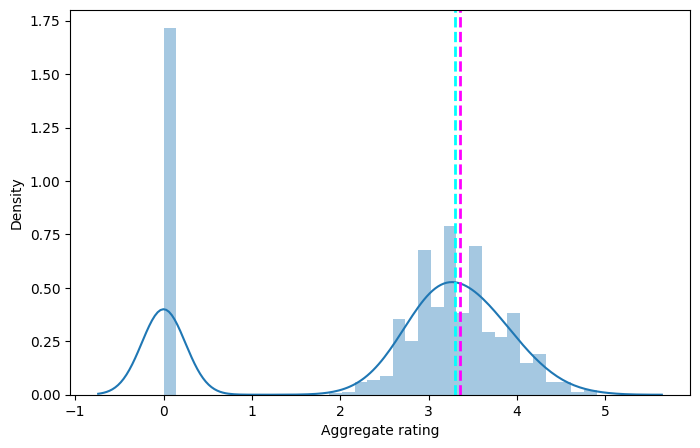

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Aggregate rating'],kde=True)
plt.axvline(mean_,color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(median_,color='cyan',linestyle='dashed',linewidth=2)
plt.show()

In [34]:
df_new['Aggregate rating']=df_new['Aggregate rating'].replace(0.0,median_)


In [35]:
df_new['Aggregate rating'].value_counts()

Aggregate rating
3.3    2611
3.1     511
3.2     510
3.4     477
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

* **Scuccessfuly replaced `0` with median rating**

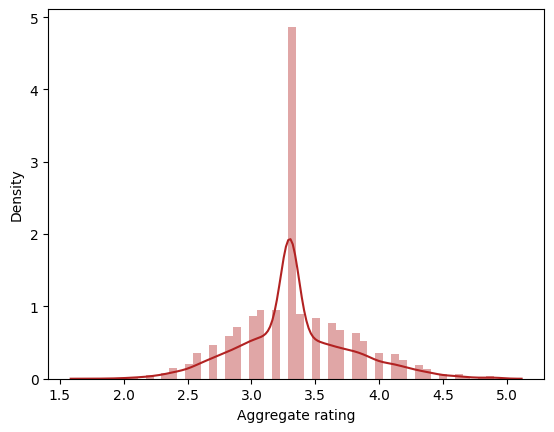

In [36]:
sns.distplot(df_new['Aggregate rating'],kde=True,color='firebrick');

In [37]:
df_new.rename(columns={'Aggregate rating':'Aggregate_rating'},inplace=True)

In [38]:
df_new.sample(2)

Country Restaurant Name       City               Locality  Longitude  \
6210   India    Chocolangels  New Delhi             Safdarjung   0.000000   
7064   India        Mandrain  New Delhi  V3S Mall, Laxmi Nagar  77.287026   

       Latitude          Cuisines  Average Cost for two Has Table booking  \
6210   0.000000  Bakery, Desserts                   300                No   
7064  28.636982           Chinese                   450                No   

     Has Online delivery Is delivering now Switch to order menu  Price range  \
6210                  No                No                   No            1   
7064                  No                No                   No            1   

      Aggregate_rating Rating color Rating text  Votes Price_category  
6210               3.3        White   Not rated      3          Cheap  
7064               2.8       Orange     Average      7          Cheap

## **`Votes`**

In [39]:
df_new.shape

(8652, 18)

In [40]:
df_new['Votes'].value_counts()

Votes
0       1093
1        481
2        323
3        242
4        207
        ... 
1515       1
1295       1
536        1
3244       1
479        1
Name: count, Length: 871, dtype: int64

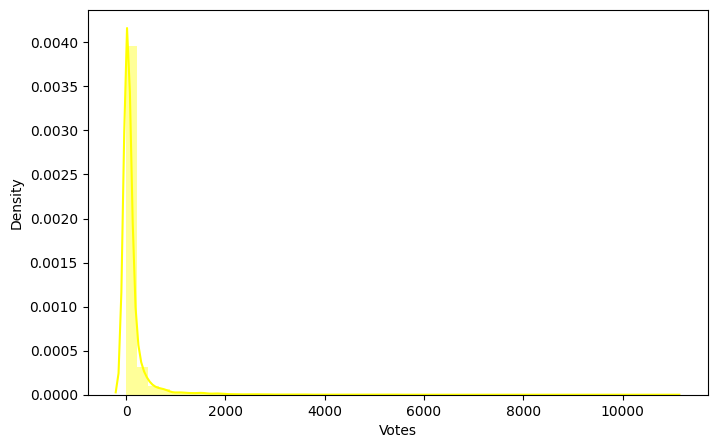

In [41]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.show()

In [42]:
len(df_new[df_new['Votes']>2200])

66

In [43]:
df_new.drop(df_new[df_new['Votes']>2200].index,inplace=True)

In [44]:
df_new.shape

(8586, 18)

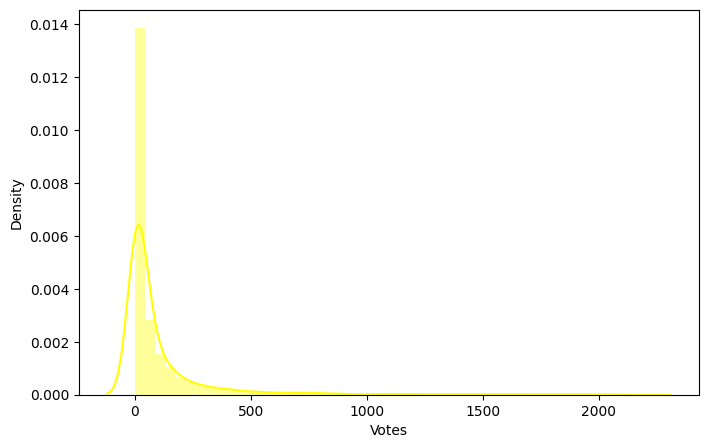

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.show()

In [46]:
# replacing 0 with null values
df_new['Votes']=df_new['Votes'].replace(0,np.nan)

# filling nan values with mean/median
df_new['Votes'].fillna(int(df_new['Votes'].median()),axis=0,inplace=True)
int(df_new['Votes'].median())

34

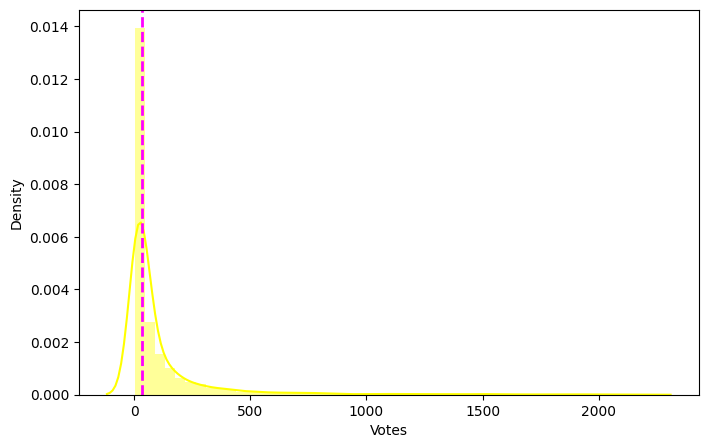

In [47]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.axvline(df_new['Votes'].median(),color='magenta',linestyle='dashed',linewidth=2)
# plt.axvline(median_,color='cyan',linestyle='dashed',linewidth=2)
plt.show()

In [48]:
df_new["Votes"]=df_new["Votes"].astype('int64')

In [49]:
df_new["Votes"].value_counts()

Votes
34      1135
1        481
2        323
3        242
4        207
        ... 
499        1
1096       1
1300       1
671        1
479        1
Name: count, Length: 805, dtype: int64

<Axes: xlabel='Average Cost for two', ylabel='Density'>

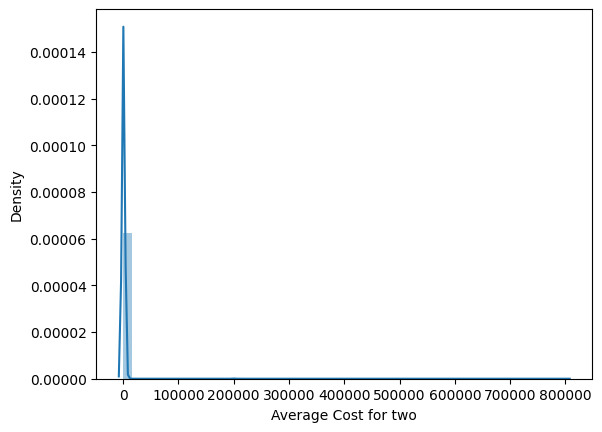

In [50]:
sns.distplot(df['Average Cost for two'])

In [51]:
# replacing 0 with null values
df_new['Average Cost for two']=df_new['Average Cost for two'].replace(0,np.nan)

# filling nan values with mean/median
df_new['Average Cost for two'].fillna(int(df_new['Average Cost for two'].median()),axis=0,inplace=True)
int(df_new['Average Cost for two'].median())

450

# **Exploratory Data Analysis(EDA)**

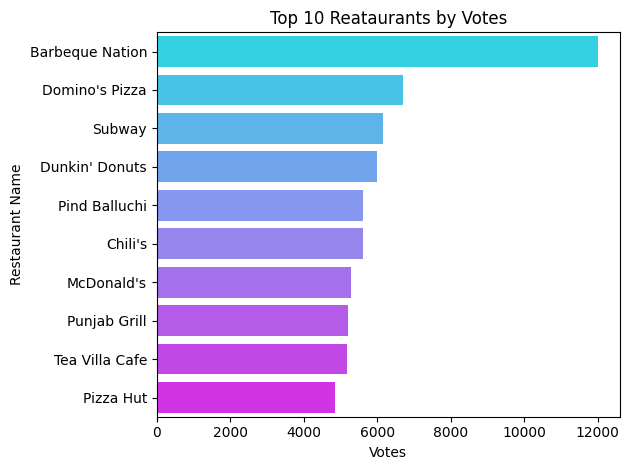

In [52]:
top_10_reataurants=df_new.groupby('Restaurant Name').Votes.sum().nlargest(10)
top_10_reataurants=top_10_reataurants.reset_index()


sns.barplot(x='Votes', y='Restaurant Name', data=top_10_reataurants,palette='cool')
plt.title('Top 10 Reataurants by Votes')


plt.tight_layout()
plt.show()


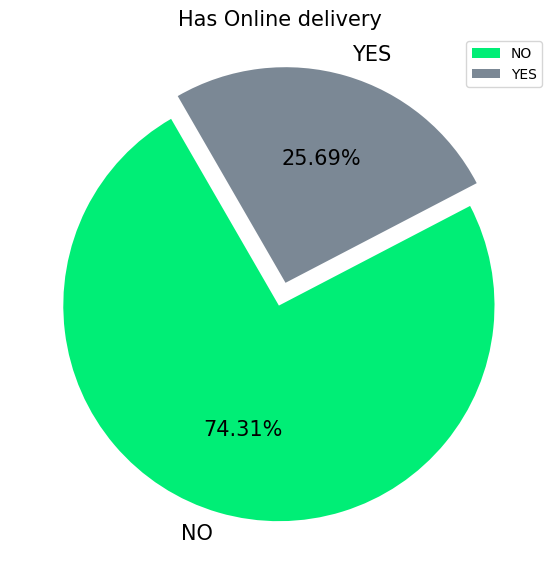

In [53]:
data = df['Has Online delivery'].value_counts()
labels = ['NO', 'YES']

# create pie chart
plt.figure(figsize=(7,7))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15},startangle=120)
plt.title('Has Online delivery',size=15,loc='center')
plt.legend();


* **Found that although its online delivery app still 74.31% restaurants dont have online delivery system.**

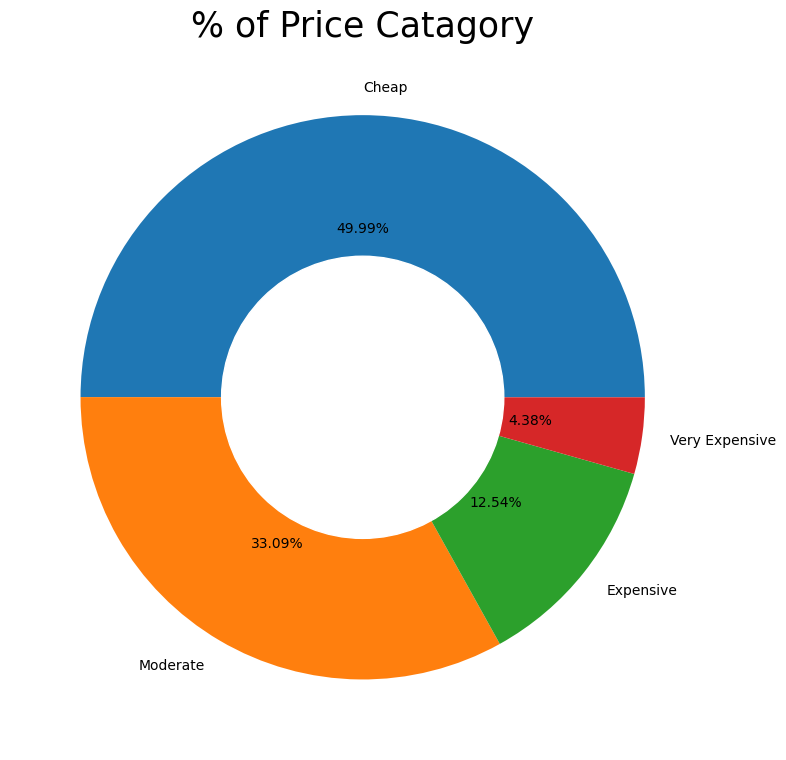

In [54]:
plt.figure(figsize=(8,8))
plt.pie(df_new.Price_category.value_counts(), labels=df_new.Price_category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of Price Catagory', fontsize = 25)
plt.tight_layout()
plt.show()


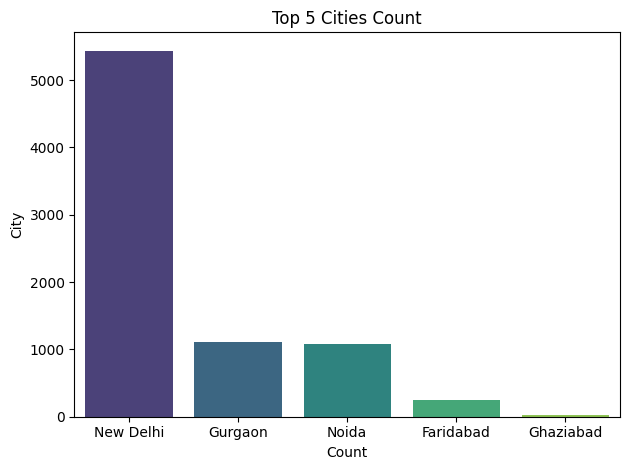

In [55]:
city_counts = df_new['City'].value_counts().nlargest(5)
# Create a count plot
# plt.figure(figsize=(8, 6))
sns.countplot(x=df_new['City'], order=city_counts.index, palette='viridis')

# Customize the plot
plt.title('Top 5 Cities Count')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [56]:
df_new.sample()

Country             Restaurant Name       City         Locality  \
2396   India  Cafe Coffee Day The Square  New Delhi  Connaught Place   

      Longitude   Latitude Cuisines  Average Cost for two Has Table booking  \
2396  77.219935  28.633726     Cafe                 700.0                No   

     Has Online delivery Is delivering now Switch to order menu  Price range  \
2396                  No                No                   No            2   

      Aggregate_rating Rating color Rating text  Votes Price_category  
2396               3.6       Yellow        Good    361       Moderate

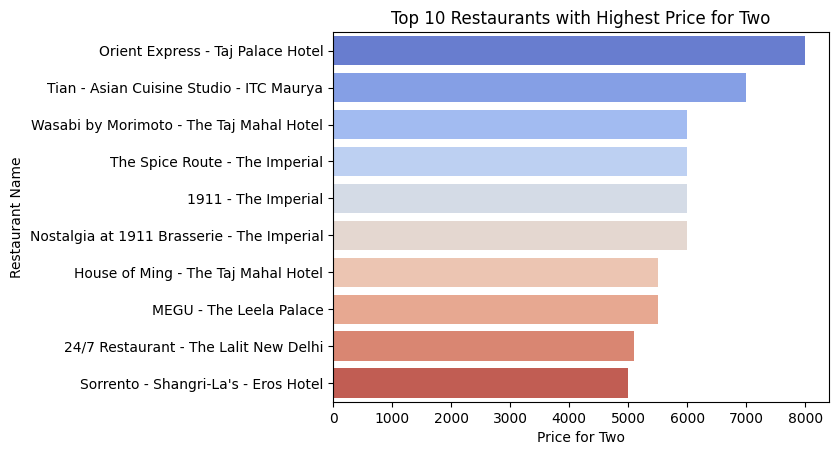

In [57]:
# Sort by 'Price_for_Two' in descending order and take the top restaurants
top_restaurants = df_new.sort_values(by='Average Cost for two', ascending=False).head(10)

# Plot the data
# plt.figure(figsize=(12, 8))
sns.barplot(x='Average Cost for two', y='Restaurant Name', data=top_restaurants, palette='coolwarm')

# Customize the plot
plt.title('Top 10 Restaurants with Highest Price for Two')
plt.xlabel('Price for Two')
plt.ylabel('Restaurant Name')
# plt.tight_layout()
plt.show()

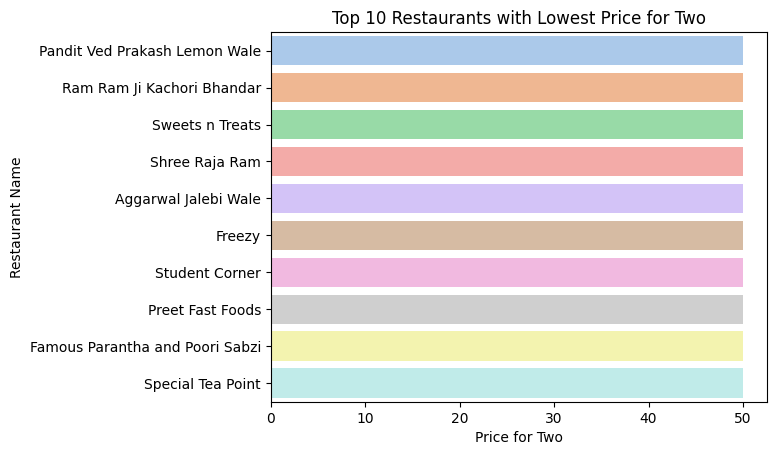

In [58]:
# Sort by 'Price_for_Two' in descending order and take the top restaurants
top_restaurants = df_new.sort_values(by='Average Cost for two', ascending=True).head(10)

# Plot the data
# plt.figure(figsize=(12, 8))
sns.barplot(x='Average Cost for two', y='Restaurant Name', data=top_restaurants, palette='pastel')

# Customize the plot
plt.title('Top 10 Restaurants with Lowest Price for Two')
plt.xlabel('Price for Two')
plt.ylabel('Restaurant Name')
plt.show()

In [59]:
df_new[df_new['Average Cost for two']==0]

Empty DataFrame
Columns: [Country, Restaurant Name, City, Locality, Longitude, Latitude, Cuisines, Average Cost for two, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate_rating, Rating color, Rating text, Votes, Price_category]
Index: []

# **Featues Selection**

In [60]:
df_new.sample(2)

Country Restaurant Name       City        Locality  Longitude   Latitude  \
4045   India        Parallel  New Delhi     Khan Market  77.226549  28.599732   
5928   India  Domino's Pizza  New Delhi  Rajinder Nagar  77.186540  28.643165   

                   Cuisines  Average Cost for two Has Table booking  \
4045  Continental, American                2000.0               Yes   
5928       Pizza, Fast Food                 700.0                No   

     Has Online delivery Is delivering now Switch to order menu  Price range  \
4045                  No                No                   No            4   
5928                  No                No                   No            2   

      Aggregate_rating Rating color Rating text  Votes  Price_category  
4045               4.0        Green   Very Good     79  Very Expensive  
5928               2.9       Orange     Average    119        Moderate

In [61]:
# dropping irrelevant columns
df_new.drop(labels=['Country','Restaurant Name','City','Locality','Cuisines'],axis=1,inplace=True)

In [62]:
df_new.sample(1)

Longitude  Latitude  Average Cost for two Has Table booking  \
5344  77.278198  28.53453                 700.0                No   

     Has Online delivery Is delivering now Switch to order menu  Price range  \
5344                  No                No                   No            2   

      Aggregate_rating Rating color Rating text  Votes Price_category  
5344               3.0       Orange     Average      6       Moderate

In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8586 entries, 0 to 8651
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Longitude             8586 non-null   float64
 1   Latitude              8586 non-null   float64
 2   Average Cost for two  8586 non-null   float64
 3   Has Table booking     8586 non-null   object 
 4   Has Online delivery   8586 non-null   object 
 5   Is delivering now     8586 non-null   object 
 6   Switch to order menu  8586 non-null   object 
 7   Price range           8586 non-null   int64  
 8   Aggregate_rating      8586 non-null   float64
 9   Rating color          8586 non-null   object 
 10  Rating text           8586 non-null   object 
 11  Votes                 8586 non-null   int64  
 12  Price_category        8586 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 939.1+ KB


In [64]:
df_new=df_new.astype({'Has Table booking':'category',
                      'Has Online delivery':'category',
                      'Is delivering now':'category',
                      'Switch to order menu':'category',
                      'Rating color':'category',
                      'Rating text':'category',
                      'Price_category':'category'})

In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8586 entries, 0 to 8651
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Longitude             8586 non-null   float64 
 1   Latitude              8586 non-null   float64 
 2   Average Cost for two  8586 non-null   float64 
 3   Has Table booking     8586 non-null   category
 4   Has Online delivery   8586 non-null   category
 5   Is delivering now     8586 non-null   category
 6   Switch to order menu  8586 non-null   category
 7   Price range           8586 non-null   int64   
 8   Aggregate_rating      8586 non-null   float64 
 9   Rating color          8586 non-null   category
 10  Rating text           8586 non-null   category
 11  Votes                 8586 non-null   int64   
 12  Price_category        8586 non-null   category
dtypes: category(7), float64(4), int64(2)
memory usage: 529.3 KB


## **Lets View Correlation**

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df_new.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['Average Cost for two'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

VIF Factor          features
0  145.464693         Longitude
1  125.187637          Latitude
2    6.234868       Price range
3   17.958003  Aggregate_rating
4    1.510016             Votes

<Axes: xlabel='Longitude', ylabel='Density'>

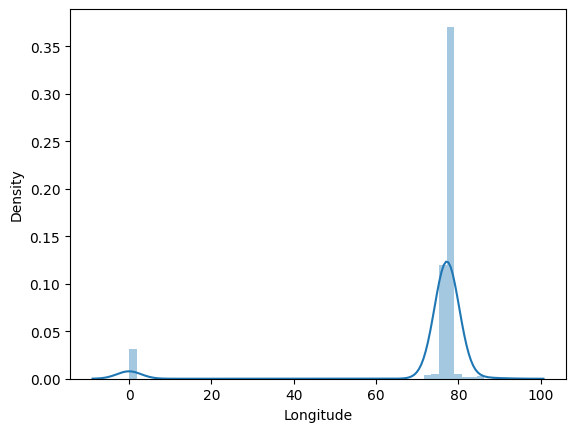

In [67]:
sns.distplot(df_new['Longitude'])

# **Model Implementation and Preprocessing**

# **`Train Test Split`**

In [68]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_new['Average Cost for two'] = pt.fit_transform(pd.DataFrame(df_new['Average Cost for two']))

In [69]:

# split the Dataset into independent(x) and dependent(y) Dataset

X = df_new.drop(columns=['Average Cost for two'])
y = df_new['Average Cost for two']

In [70]:
X

Longitude   Latitude Has Table booking Has Online delivery  \
0     78.011544  27.161661                No                  No   
1      0.000000   0.000000                No                  No   
2     78.011608  27.160832                No                  No   
3     77.998092  27.195928                No                  No   
4     78.007553  27.201725                No                  No   
...         ...        ...               ...                 ...   
8647  83.361377  17.764287                No                  No   
8648   0.000000   0.000000                No                  No   
8649  83.315281  17.719539                No                  No   
8650  83.336840  17.721182                No                  No   
8651  83.314942  17.721119                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate_rating  \
0                   No                   No            3               3.9   
1                   No                   No            2               3.5   
2                   No                   No            2               3.6   
3                   No                   No            2               4.0   
4                   No                   No            3               4.2   
...                ...                  ...          ...               ...   
8647                No                   No            2               3.6   
8648                No                   No            2               3.7   
8649                No                   No            2               4.3   
8650                No                   No            4               3.8   
8651                No                   No            3               4.4   

     Rating color Rating text  Votes  Price_category  
0          Yellow        Good    140       Expensive  
1          Yellow        Good     71        Moderate  
2          Yellow        Good     94        Moderate  
3           Green   Very Good     87        Moderate  
4           Green   Very Good    177       Expensive  
...           ...         ...    ...             ...  
8647       Yellow        Good    193        Moderate  
8648       Yellow        Good     85        Moderate  
8649        Green   Very Good    172        Moderate  
8650       Yellow        Good     74  Very Expensive  
8651        Green   Very Good    316       Expensive  

[8586 rows x 12 columns]

In [71]:
y

0       0.838142
1       0.585033
2       0.136399
3      -0.168231
4       1.046813
          ...   
8647    0.381082
8648   -0.168231
8649    0.381082
8650    1.554957
8651    1.469734
Name: Average Cost for two, Length: 8586, dtype: float64

In [72]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(6868, 12)
(1718, 12)


In [73]:
X.sample(1)

Longitude   Latitude Has Table booking Has Online delivery  \
6671  77.217837  28.620766               Yes                  No   

     Is delivering now Switch to order menu  Price range  Aggregate_rating  \
6671                No                   No            4               3.4   

     Rating color Rating text  Votes  Price_category  
6671       Orange     Average     27  Very Expensive

# **Data pre-processing using ColumnTransformer for make Pipeline**

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.
step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,7,10]),
    ('col_tnf1', PowerTransformer(),[0,1,7,10]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[2,3,4,5]),
    ('col_tnf3', OrdinalEncoder(categories=[['White','Red','Orange','Yellow','Green','Dark Green']]),[8]),
    ('col_tnf4', OrdinalEncoder(categories=[['Not rated','Poor','Average','Good','Very Good','Excellent']]),[9]),
    ('col_tnf5', OrdinalEncoder(categories=[['Cheap','Moderate','Expensive','Very Expensive']]),[11])
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

# **`Linear Regression`**

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7636404395137008
Adjusted R2 score 0.763226680983309


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.768084454800453
Adjusted R2 score 0.7664522046289606


The performance metrics
-----------------------------------------
MAE 0.3567901457564342
MSE 0.2235003643650092
RMSE 0.4727582515038835


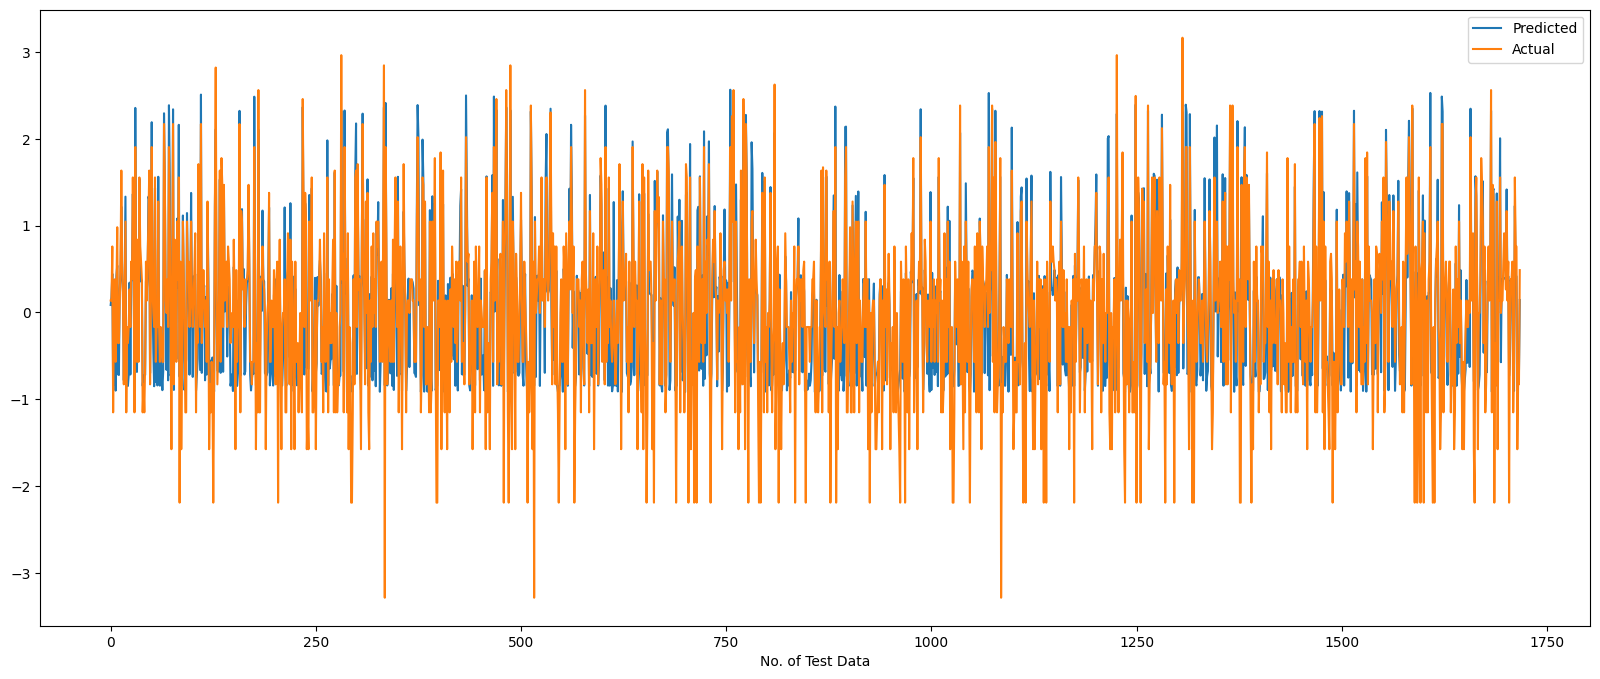

In [76]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Ridge Regression(L2) with hyperparameter tuning`**

In [77]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7636090915822265
Adjusted R2 score 0.7631952781758058


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7681216382754419
Adjusted R2 score 0.7664896498058262


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 25}
cross-validation score 0.7621326201218228


The performance metrics
-----------------------------------------
MAE 0.35658624797017807
MSE 0.22346453011249612
RMSE 0.47272035085502306


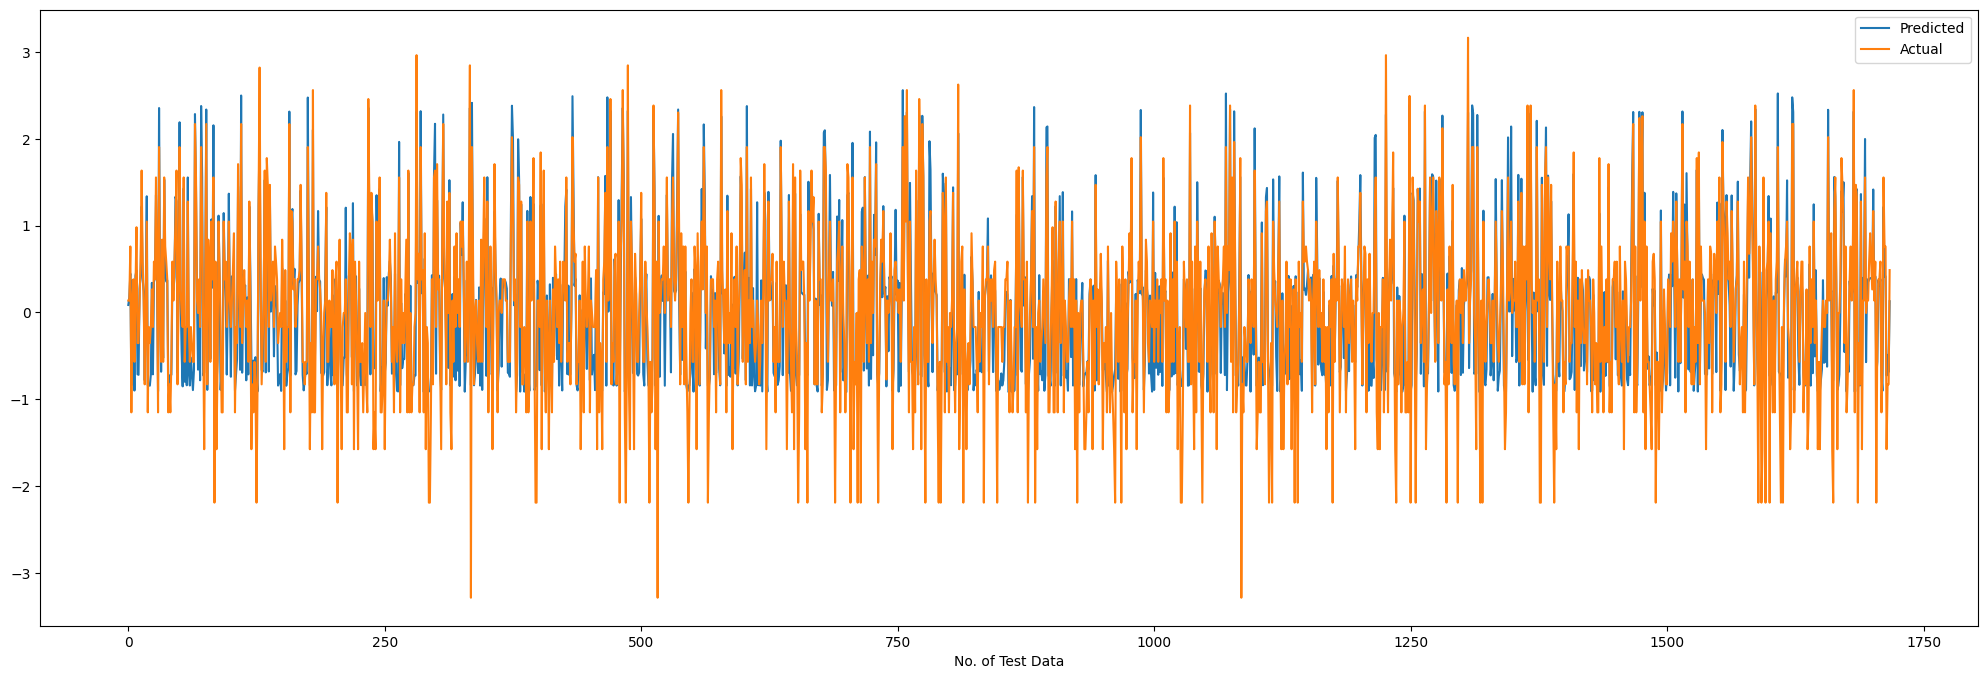

In [78]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Lasso Regression(L1) with hyperparameter tuning`**

In [79]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.linear_model import Lasso

Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7636354098781384
Adjusted R2 score 0.763221642543133


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7680573793788146
Adjusted R2 score 0.7664249386471699


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 0.0001}
cross-validation score 0.7621180829866018


The performance metrics
-----------------------------------------
MAE 0.356806469928396
MSE 0.22352645734034765
RMSE 0.4727858472293218


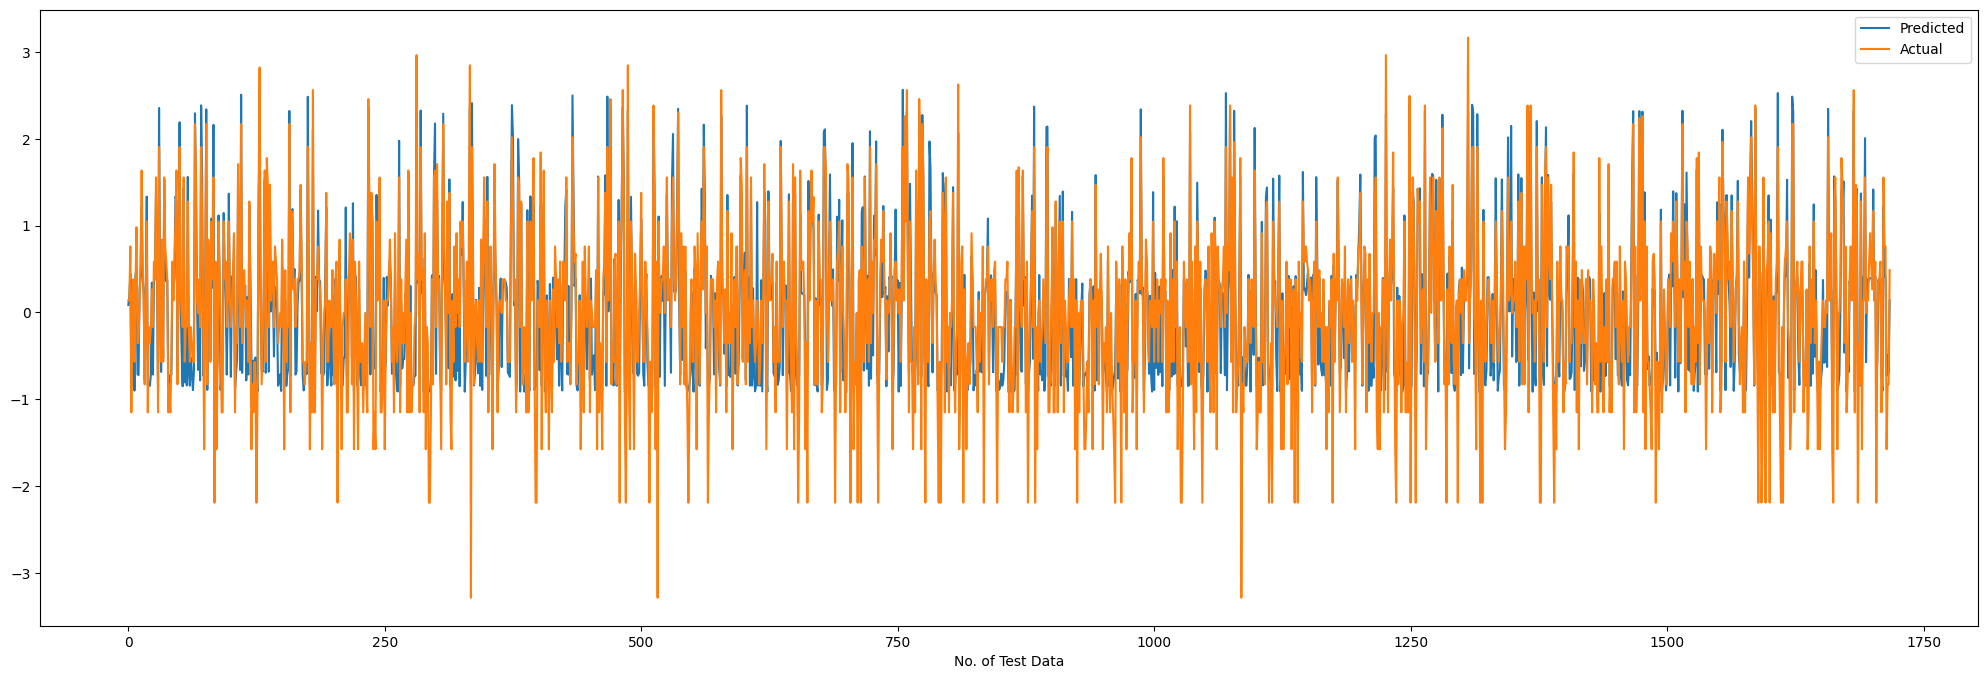

In [80]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`DecisionTreeRegressor with Hyperparameter tuning`**

In [81]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...s=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7932377045336443
Adjusted R2 score 0.7928757574081015


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7787348759708748
Adjusted R2 score 0.7771775847753619


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.7760730325592345


The performance metrics
-----------------------------------------
MAE 0.3423939385646263
MSE 0.2132363994799389
RMSE 0.4617752694546763


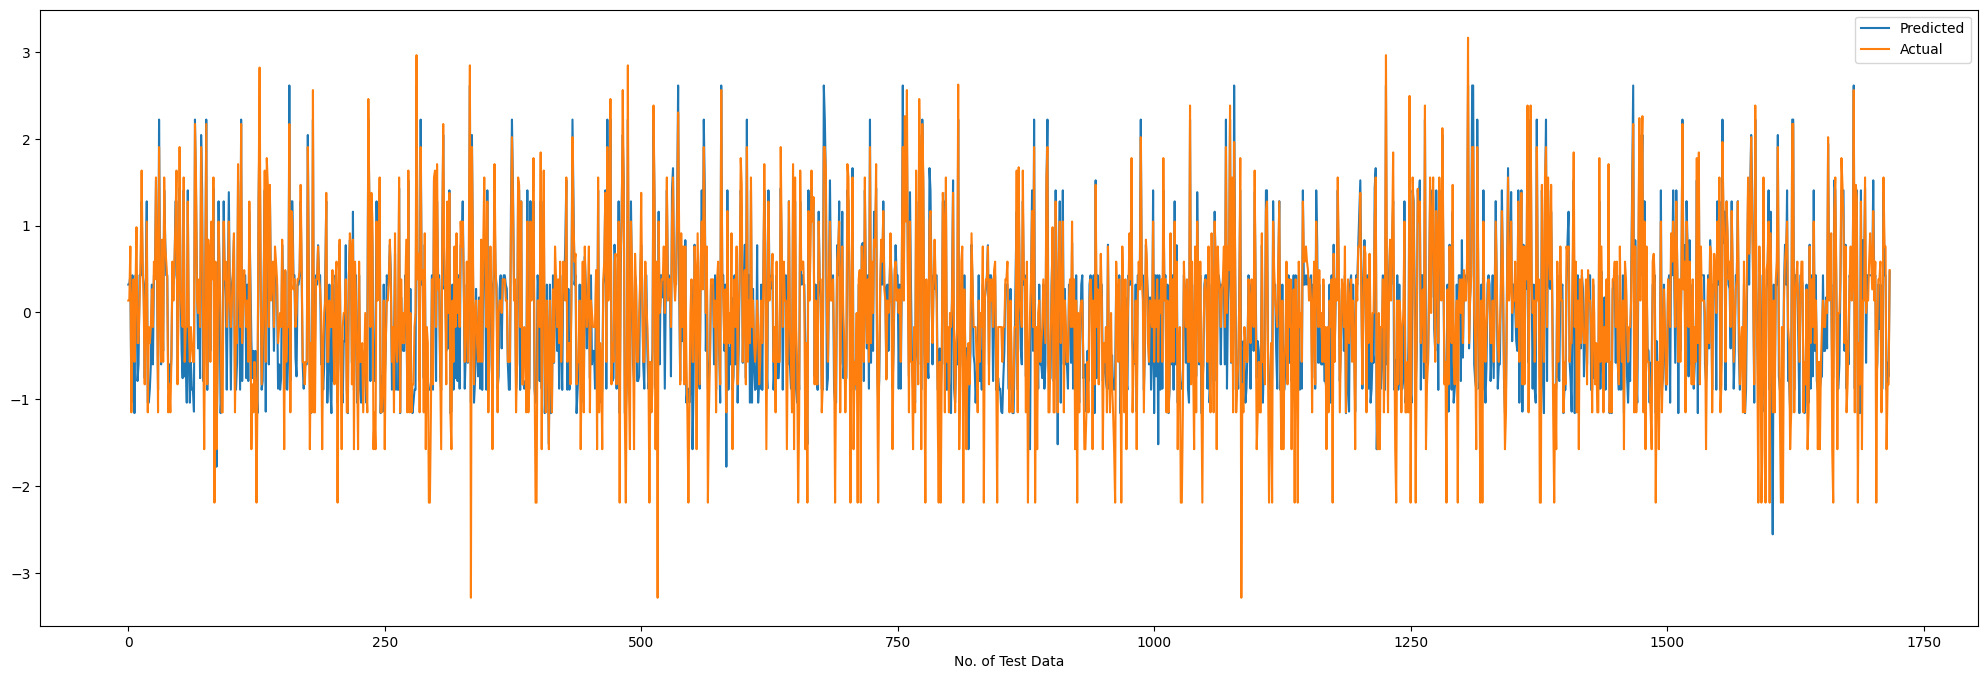

In [82]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`RandomForestRegressor with hyperparameter tuning`**

In [83]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...ategories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7991288924838039
Adjusted R2 score 0.7987772581599244


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7894661246407454
Adjusted R2 score 0.7879843612951084


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.7824007741000848


The performance metrics
-----------------------------------------
MAE 0.33457864616412675
MSE 0.20289453996489895
RMSE 0.4504381644187124


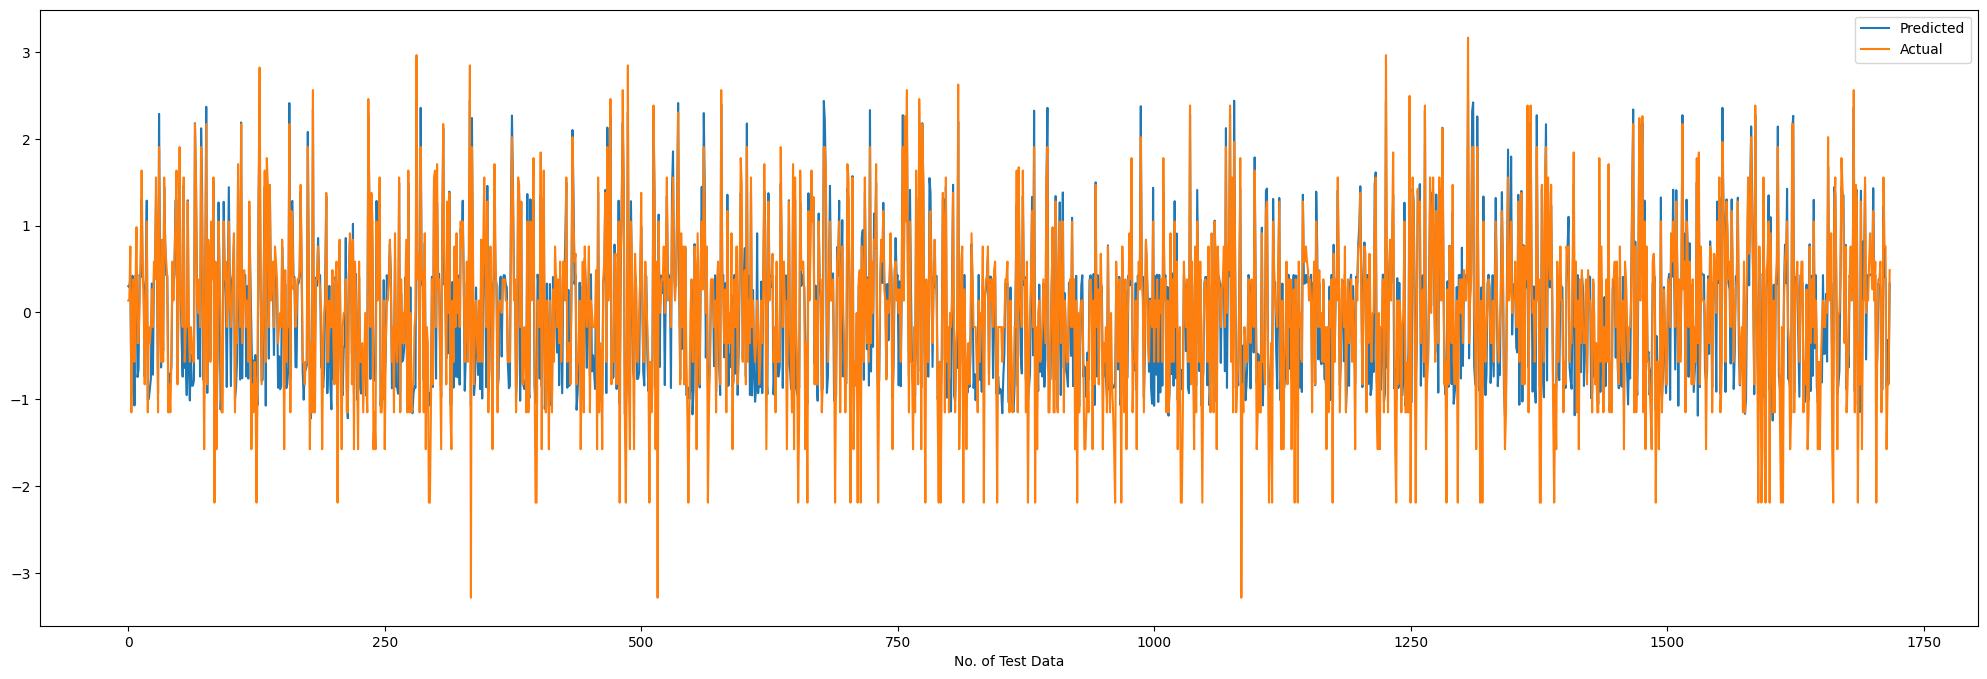

In [84]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`AdaBoostRegressor with hyperparameter tuning`**

In [85]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[200],                         # 50,80,120,160,180,200,220,240
    'learning_rate' :[0.01],                       # 0.0001,0.001,0.01,0.1,1
    'loss' :['linear']                             # 'linear', 'square', 'exponential'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.01],
                                          'loss': ['linear'],
                                          'n_estimators': [200]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7670042236088342
Adjusted R2 score 0.7665963535407534


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7684717568039914
Adjusted R2 score 0.7668422325117028


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}
cross-validation score 0.7646265791885499


The performance metrics
-----------------------------------------
MAE 0.35764028993946956
MSE 0.22312711582388334
RMSE 0.47236333031246547


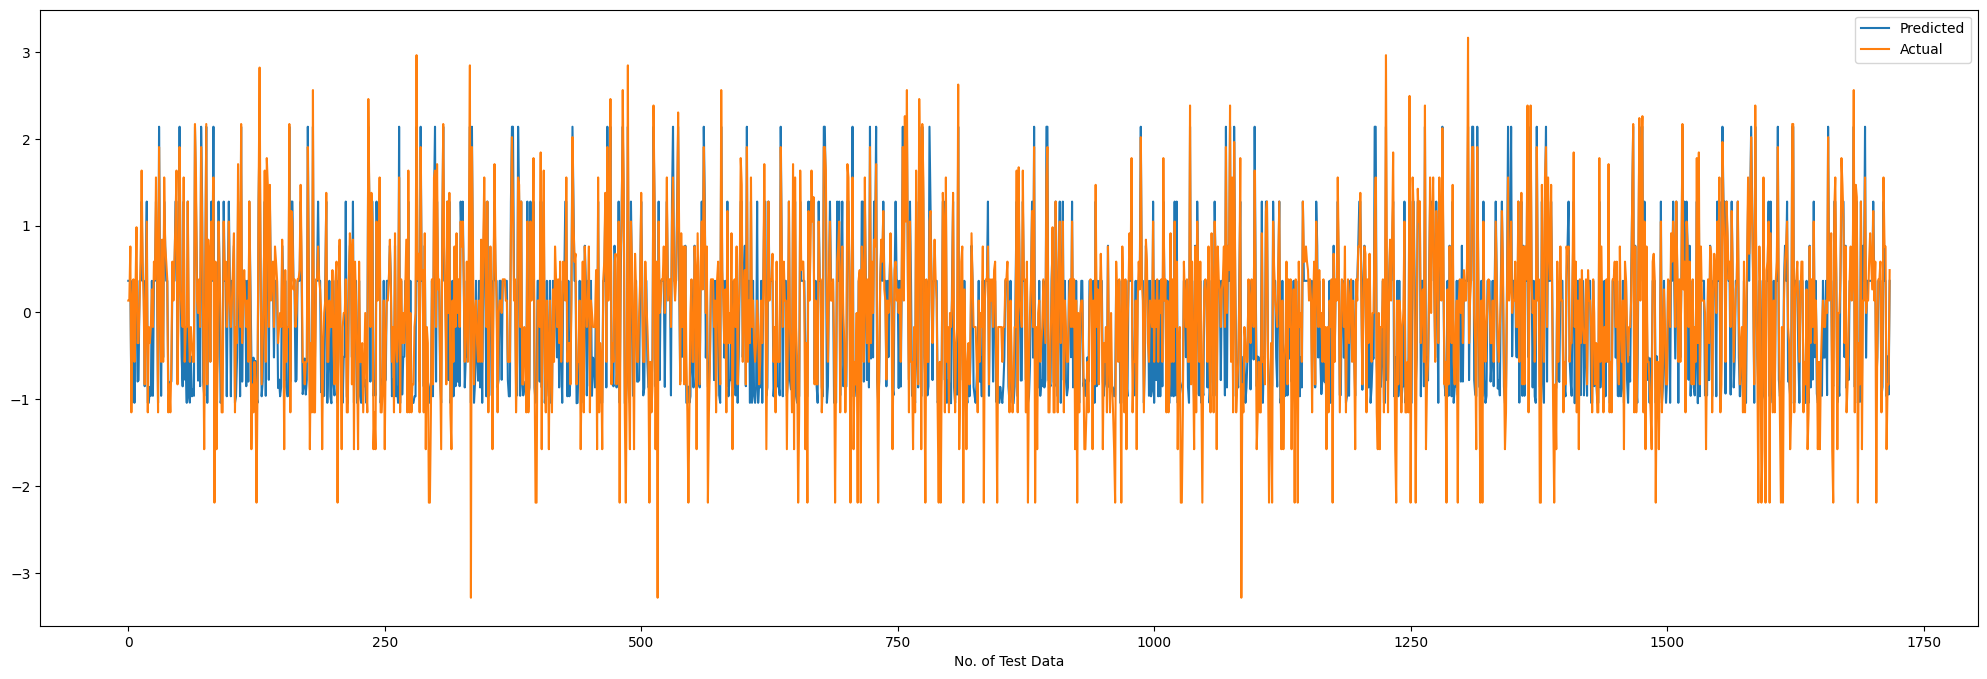

In [86]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`GradientBoostingRegressor with hyperparameter tuning`**

In [87]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[160],                                                        # 60,100,140,160,180,200,220
    'learning_rate' :[0.05],                                                      # 0.001,0.01,0.05,0.1,1.0
    'max_depth' :[7],                                                             # 4,5,6,7,8
    'max_leaf_nodes' :[8]                                                         # 4,6,8,12,16,20,24,32,None
    #'loss' :['squared_error']                                                    # 'squared_error', 'absolute_error', 'huber'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = gbr


# make pipeline
pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...ies=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [7],
                                          'max_leaf_nodes': [8],
                                          'n_estimators': [160]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8016546460318736
Adjusted R2 score 0.8013074331584065


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7910365739162974
Adjusted R2 score 0.7895658635860896


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 7, 'max_leaf_nodes': 8, 'n_estimators': 160}
cross-validation score 0.7852155430928218


The performance metrics
-----------------------------------------
MAE 0.3328648143795441
MSE 0.20138107528964125
RMSE 0.4487550281497036


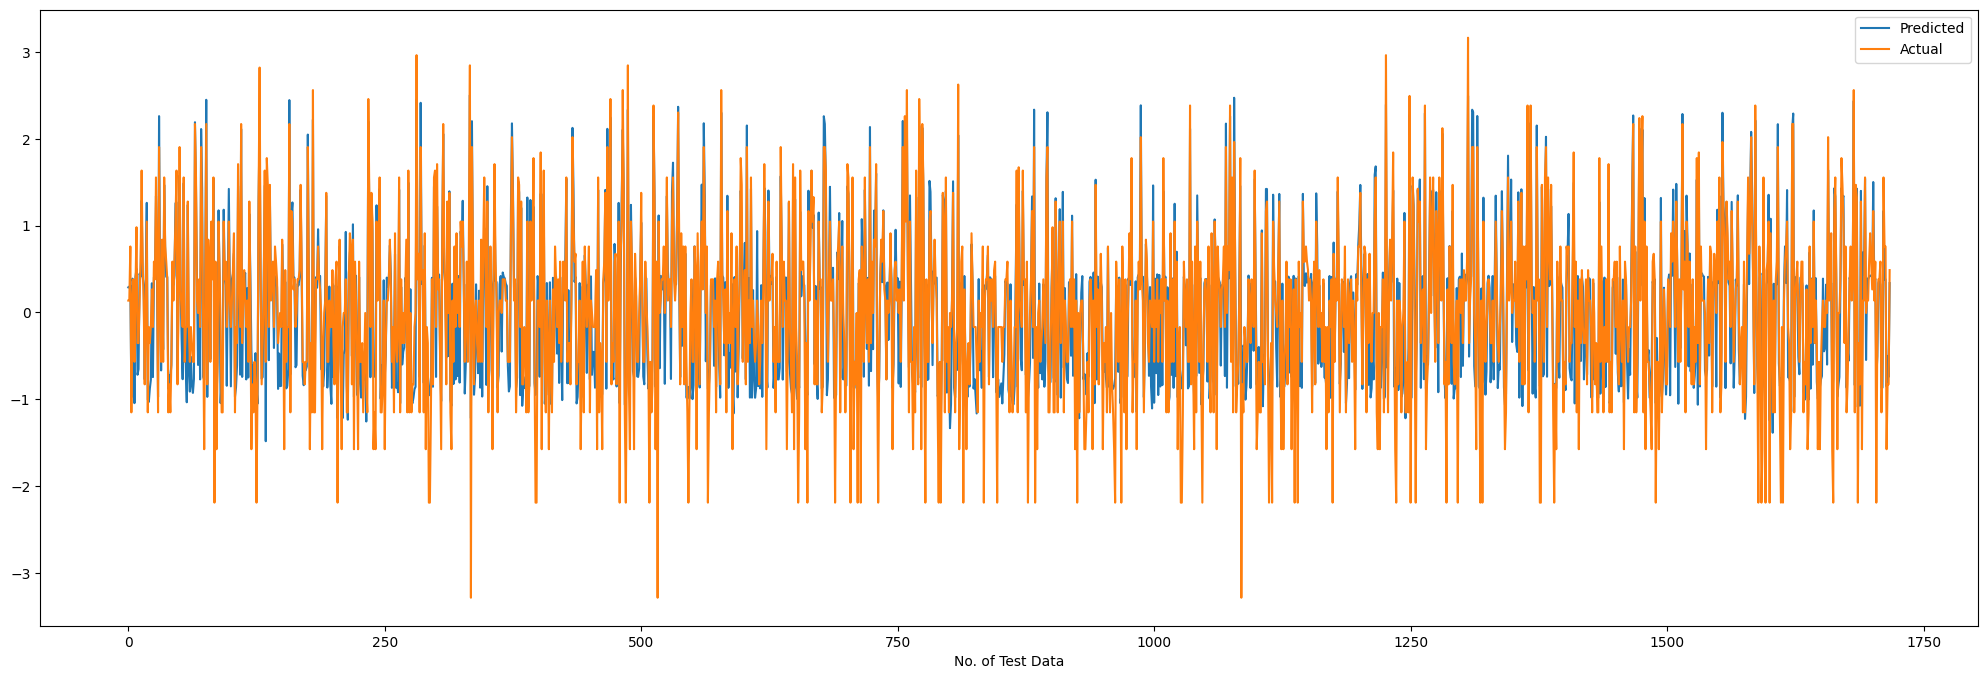

In [88]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

In [101]:
# Get the original feature names
feature_names = pipe7.named_steps['step1'].get_feature_names_out()

# Combine feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display sorted feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: col_tnf5__Price_category, Importance: 0.47578833908806134
Feature: remainder__Price range, Importance: 0.457667831282015
Feature: col_tnf2__Has Table booking_Yes, Importance: 0.011019455162589311
Feature: col_tnf2__Has Online delivery_Yes, Importance: 0.009212337788721218
Feature: col_tnf1__Latitude, Importance: 0.00858695597813224
Feature: col_tnf__Latitude, Importance: 0.008406551806110149
Feature: col_tnf1__Longitude, Importance: 0.005979110169225969
Feature: col_tnf__Longitude, Importance: 0.005395251078893665
Feature: col_tnf1__Votes, Importance: 0.0036212968300047485
Feature: col_tnf__Votes, Importance: 0.00327280297170707
Feature: col_tnf4__Rating text, Importance: 0.003174678251671192
Feature: col_tnf__Aggregate_rating, Importance: 0.002825933274285028
Feature: col_tnf3__Rating color, Importance: 0.0027364122642925654
Feature: col_tnf1__Aggregate_rating, Importance: 0.002262946195401056
Feature: col_tnf2__Is delivering now_Yes, Importance: 5.009785888948236e-05


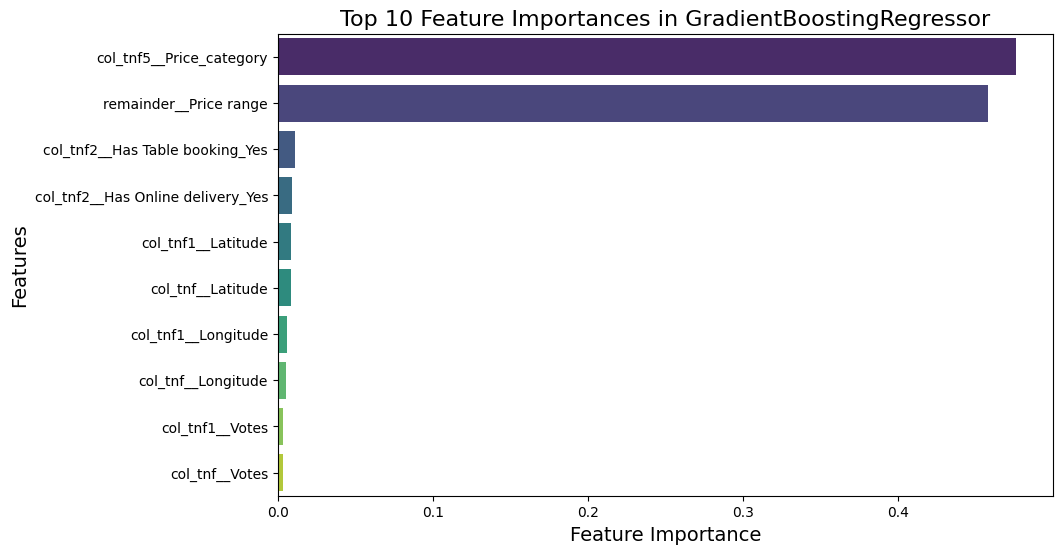

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Access the GradientBoostingRegressor model from the pipeline
fitted_gbr = pipe7.named_steps['step2'].best_estimator_

# Get the feature importances
feature_importances = fitted_gbr.feature_importances_

# Get the original feature names
feature_names = pipe7.named_steps['step1'].get_feature_names_out()

# Combine feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance and select the top 10
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Separate the features and their importance for plotting
top_features = [item[0] for item in sorted_importances]
top_importances = [item[1] for item in sorted_importances]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")

# Add titles and labels
plt.title('Top 10 Feature Importances in GradientBoostingRegressor', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()


In [91]:
import pickle

In [94]:
# Save the pipeline
pipeline_filename = 'gbr_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipe7, file)

print(f"Pipeline saved to {pipeline_filename}")

# Load the pipeline
with open(pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

print("Pipeline loaded successfully")

# Use the loaded pipeline to make predictions
loaded_predictions = loaded_pipeline.predict(X_test)
print(f"Predictions: {loaded_predictions[:5]}")  # Display first 5 predictions

Pipeline saved to gbr_pipeline.pkl
Pipeline loaded successfully
Predictions: [ 0.28876253  0.29743823  0.30957845 -0.97876691  0.38902209]


In [97]:
from sklearn.preprocessing import PowerTransformer

# Assuming `pt` is the PowerTransformer you used for the target variable
# Make predictions using the pipeline
y_pred_scaled = pipe7.predict(X_test)

# Apply inverse transformation to get the original scale of predictions
y_pred_original = pt.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# For the training set, if required:
y_pred_train_scaled = pipe7.predict(X_train)
y_pred_train_original = pt.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()

# Now you can use `y_pred_original` to get predictions in the original scale
print(f"Original Scale Predictions: {y_pred_original[:5]}")  # Display first 5 predictions



Original Scale Predictions: [559.92827752 563.56750385 568.70313876 225.24862354 603.5887787 ]


# **Conclusion**

## **🥇GradientBoostingRegressor algorithm with hyperparameter🥇**

**`Training data R2 and Adjusted R2 Score`**

*   R2 score 0.83493
*   Adjusted R2 score 0.83464

**`Testing data R2 and Adjusted R2 Score`**

*   R2 score 0.8120
*   Adjusted R2 score 0.8107

**`Cross-validation score`**

*   cross-validation score 0.805

**`The performance metrics`**

*   MAE 0.314
*   MSE 0.183
*   RMSE 0.428








 *At the end a word of Thankyou to you for going through project till the very end, genuinely appreciate your time. Happy Learning!*